In [1]:
import sys
import pickle
sys.path.append('../..')
import pandas as pd
from datetime import datetime
from pgbm_model import pgbm_pred
import matplotlib.pyplot as plt
from preprocessing import get_nn_data
from lstm import build_model, make_pred
from plots_lstm import plot_loss, plot_comp 
from sklearn.metrics import mean_squared_error as mse 

In [2]:
CITY = 3304557
CITY_NAME = 'Rio de Janeiro'
STATE = 'RJ'
FILENAME_DATA = f'../../data/dengue_{CITY}_cluster.csv'
FILE_CHIK = f'../../data/chik_{CITY}_cluster.csv'

In [3]:
df_ = pd.read_csv(FILENAME_DATA, index_col = 'Unnamed: 0' )
df_.index = pd.to_datetime(df_.index)
df_

,casos_3303203,casos_est_3303203,casos_est_min_3303203,casos_est_max_3303203,p_rt1_3303203,p_inc100k_3303203,temp_min_3303203,temp_max_3303203,umid_min_3303203,pressao_min_3303203,...,casos_3304557,casos_est_3304557,casos_est_min_3304557,casos_est_max_3304557,p_rt1_3304557,p_inc100k_3304557,temp_min_3304557,temp_max_3304557,umid_min_3304557,pressao_min_3304557
2010-01-03,0,0.0,0,0,0.0,0.000000,24.333333,33.000000,42.000000,1009.666667,...,31,31.0,31,31.0,0.000000,0.459408,24.333333,33.000000,42.000000,1009.666667
2010-01-10,0,0.0,0,0,0.0,0.000000,25.428571,34.000000,43.285714,1008.000000,...,45,45.0,45,45.0,0.000000,0.666883,25.428571,34.000000,43.285714,1008.000000
2010-01-17,0,0.0,0,0,0.0,0.000000,24.142857,34.000000,43.857143,1010.285714,...,48,48.0,48,48.0,0.000000,0.711341,24.142857,34.000000,43.857143,1010.285714
2010-01-24,0,0.0,0,0,0.0,0.000000,23.714286,34.285714,39.285714,1009.000000,...,56,56.0,56,56.0,0.000000,0.829898,23.714286,34.285714,39.285714,1009.000000
2010-01-31,1,1.0,1,1,0.0,0.614655,23.857143,33.857143,41.285714,1009.857143,...,69,69.0,69,69.0,0.000000,1.022553,23.857143,33.857143,41.285714,1009.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-27,0,0.0,0,0,0.0,0.000000,21.142857,27.000000,64.119624,1010.000000,...,79,85.0,80,94.0,0.003376,1.259667,21.142857,27.000000,64.119624,1010.000000
2022-12-04,0,0.0,0,0,0.0,0.000000,23.000000,30.571429,60.802093,1006.000000,...,92,101.0,94,112.0,0.476576,1.496781,23.000000,30.571429,60.802093,1006.000000
2022-12-11,0,0.0,0,0,0.0,0.000000,22.142857,29.142857,60.530664,1008.285714,...,106,126.0,115,142.0,0.983867,1.867271,22.142857,29.142857,60.530664,1008.285714
2022-12-18,0,0.0,0,0,0.0,0.000000,20.833333,28.833333,53.115433,1007.000000,...,89,131.0,109,168.0,0.962391,1.941369,20.833333,28.833333,53.115433,1007.000000


Text(0.5, 1.0, 'Chik incidence')

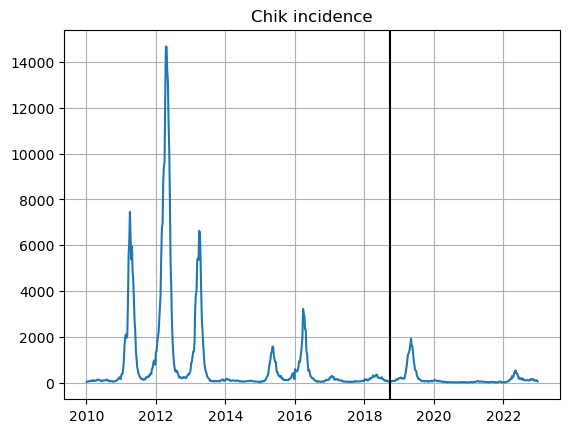

In [4]:
fig,ax = plt.subplots()
ax.plot(df_.casos_3304557)

ax.axvline(pd.to_datetime('2018-10-01'), color = 'black')

ax.grid()

ax.set_title('Chik incidence')

## Neural network model 

Parameters of the models:

In [5]:
END_DATE = '2019-02-10'  # assign the last day used to evaluate the dengue model 
PREDICT_N = 4 # number of new days predicted
LOOK_BACK = 4 # number of last days used to make the prediction 
EPOCHS = 400
HIDDEN = 8
FEAT = 65 # number of features

Let's train the model with the loss function == msle 

Compilation Time :  0.003801107406616211
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4, 65)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             4736      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
   

2023-03-11 19:30:27.457863: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


298/298 [==============================] - 3s 5ms/step - loss: 0.0106 - accuracy: 0.2718 - mape: 317.3705 - mse: 0.0193 - val_loss: 0.0056 - val_accuracy: 0.2830 - val_mape: 351.8740 - val_mse: 0.0112
Epoch 2/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0043 - accuracy: 0.3154 - mape: 118.4849 - mse: 0.0088 - val_loss: 0.0026 - val_accuracy: 0.3585 - val_mape: 125.7792 - val_mse: 0.0058
Epoch 3/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0037 - accuracy: 0.3188 - mape: 121.9367 - mse: 0.0076 - val_loss: 0.0031 - val_accuracy: 0.3585 - val_mape: 153.0930 - val_mse: 0.0067
Epoch 4/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0033 - accuracy: 0.3221 - mape: 147.5899 - mse: 0.0067 - val_loss: 0.0041 - val_accuracy: 0.5472 - val_mape: 104.0670 - val_mse: 0.0093
Epoch 5/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0026 - accuracy: 0.3758 - mape: 119.7209 - mse: 0.0050 - val_loss: 0.0028 - val_acc

298/298 [==============================] - 1s 4ms/step - loss: 0.0010 - accuracy: 0.4732 - mape: 107.4431 - mse: 0.0018 - val_loss: 0.0016 - val_accuracy: 0.5849 - val_mape: 77.0856 - val_mse: 0.0033
Epoch 40/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.4094 - mape: 105.0772 - mse: 0.0019 - val_loss: 0.0014 - val_accuracy: 0.6038 - val_mape: 89.2517 - val_mse: 0.0035
Epoch 41/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.4128 - mape: 106.3881 - mse: 0.0022 - val_loss: 0.0023 - val_accuracy: 0.4717 - val_mape: 78.9872 - val_mse: 0.0062
Epoch 42/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0012 - accuracy: 0.4262 - mape: 101.5496 - mse: 0.0021 - val_loss: 0.0014 - val_accuracy: 0.5094 - val_mape: 88.2309 - val_mse: 0.0030
Epoch 43/400
298/298 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 0.4631 - mape: 103.1733 - mse: 0.0028 - val_loss: 0.0015 - val_acc

298/298 [==============================] - 3s 9ms/step - loss: 9.0751e-04 - accuracy: 0.4463 - mape: 89.7015 - mse: 0.0018 - val_loss: 8.6675e-04 - val_accuracy: 0.5472 - val_mape: 131.9966 - val_mse: 0.0015
Epoch 78/400
298/298 [==============================] - 1s 4ms/step - loss: 8.4298e-04 - accuracy: 0.4732 - mape: 89.7221 - mse: 0.0016 - val_loss: 9.4172e-04 - val_accuracy: 0.5849 - val_mape: 77.8884 - val_mse: 0.0018
Epoch 79/400
298/298 [==============================] - 2s 5ms/step - loss: 8.4944e-04 - accuracy: 0.4664 - mape: 88.8176 - mse: 0.0016 - val_loss: 0.0010 - val_accuracy: 0.5283 - val_mape: 82.2716 - val_mse: 0.0017
Epoch 80/400
298/298 [==============================] - 1s 5ms/step - loss: 7.2282e-04 - accuracy: 0.4698 - mape: 90.1278 - mse: 0.0013 - val_loss: 0.0025 - val_accuracy: 0.5472 - val_mape: 80.1979 - val_mse: 0.0054
Epoch 81/400
298/298 [==============================] - 2s 5ms/step - loss: 0.0011 - accuracy: 0.4732 - mape: 83.4390 - mse: 0.0020 - val_lo

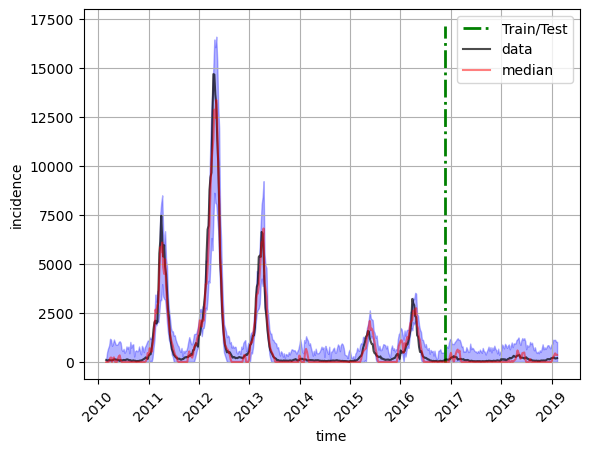

CPU times: user 4min 11s, sys: 14.7 s, total: 4min 26s
Wall time: 3min 52s


In [6]:
%%time

model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

metrics_msle, hist_msle, m_train, m_val = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 0.75, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle', filename = FILENAME_DATA)

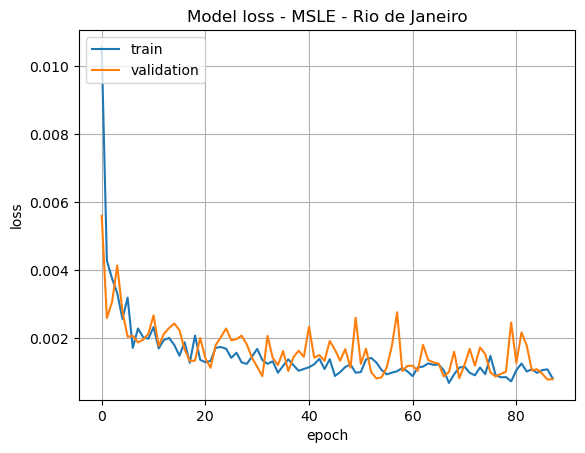

In [7]:
plot_loss(hist_msle, title = 'Model loss - MSLE - Rio de Janeiro')

Now, let's retrain the models with all the data available to apply the transfer learning step later:

In [8]:
END_DATE = '2019-02-10'

Compilation Time :  0.0027360916137695312
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4, 65)]           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 4, 8)             4736      
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 4, 8)              0         
                                                                 
 lstm_1 (LSTM)               (None, 8)                 544       
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         


396/396 [==============================] - 2s 4ms/step - loss: 7.8198e-04 - accuracy: 0.4242 - mape: 95.9776 - mse: 0.0013 - val_loss: 0.0011 - val_accuracy: 0.3803 - val_mape: 119.4812 - val_mse: 0.0021
Epoch 33/400
396/396 [==============================] - 2s 4ms/step - loss: 0.0010 - accuracy: 0.3965 - mape: 102.5452 - mse: 0.0019 - val_loss: 0.0015 - val_accuracy: 0.3521 - val_mape: 104.1445 - val_mse: 0.0029
Epoch 34/400
396/396 [==============================] - 2s 4ms/step - loss: 8.6769e-04 - accuracy: 0.4470 - mape: 101.5610 - mse: 0.0016 - val_loss: 9.6209e-04 - val_accuracy: 0.3803 - val_mape: 100.1676 - val_mse: 0.0020
Epoch 35/400
396/396 [==============================] - 2s 4ms/step - loss: 9.4316e-04 - accuracy: 0.3990 - mape: 106.2009 - mse: 0.0017 - val_loss: 6.2369e-04 - val_accuracy: 0.4085 - val_mape: 86.5744 - val_mse: 0.0010
Epoch 36/400
396/396 [==============================] - 2s 4ms/step - loss: 7.4197e-04 - accuracy: 0.4318 - mape: 94.6666 - mse: 0.0013 - v

Epoch 70/400
396/396 [==============================] - 2s 4ms/step - loss: 6.5725e-04 - accuracy: 0.4141 - mape: 94.6923 - mse: 0.0012 - val_loss: 0.0014 - val_accuracy: 0.4085 - val_mape: 84.5592 - val_mse: 0.0027
Epoch 71/400
396/396 [==============================] - 2s 4ms/step - loss: 6.1273e-04 - accuracy: 0.4293 - mape: 89.5504 - mse: 0.0011 - val_loss: 7.0175e-04 - val_accuracy: 0.3944 - val_mape: 84.1214 - val_mse: 0.0013
Epoch 72/400
396/396 [==============================] - 2s 4ms/step - loss: 8.2959e-04 - accuracy: 0.4293 - mape: 91.3986 - mse: 0.0015 - val_loss: 8.2837e-04 - val_accuracy: 0.4085 - val_mape: 92.4061 - val_mse: 0.0015
Epoch 73/400
396/396 [==============================] - 2s 4ms/step - loss: 7.3458e-04 - accuracy: 0.4242 - mape: 93.4484 - mse: 0.0014 - val_loss: 0.0015 - val_accuracy: 0.4085 - val_mape: 85.2151 - val_mse: 0.0034
Epoch 74/400
396/396 [==============================] - 2s 4ms/step - loss: 6.7830e-04 - accuracy: 0.4343 - mape: 94.6383 - mse:

396/396 [==============================] - 2s 5ms/step - loss: 7.4094e-04 - accuracy: 0.4268 - mape: 88.6150 - mse: 0.0015 - val_loss: 8.0859e-04 - val_accuracy: 0.4085 - val_mape: 91.5105 - val_mse: 0.0016
Epoch 108/400
396/396 [==============================] - 2s 5ms/step - loss: 5.6088e-04 - accuracy: 0.4217 - mape: 90.5712 - mse: 9.6774e-04 - val_loss: 9.4849e-04 - val_accuracy: 0.3944 - val_mape: 84.1601 - val_mse: 0.0021
Epoch 109/400
396/396 [==============================] - 2s 5ms/step - loss: 6.6515e-04 - accuracy: 0.4040 - mape: 94.6485 - mse: 0.0013 - val_loss: 7.9963e-04 - val_accuracy: 0.4366 - val_mape: 126.3499 - val_mse: 0.0016
Epoch 110/400
396/396 [==============================] - 2s 5ms/step - loss: 6.4877e-04 - accuracy: 0.4293 - mape: 89.6216 - mse: 0.0012 - val_loss: 7.1719e-04 - val_accuracy: 0.4085 - val_mape: 82.3402 - val_mse: 0.0013
Epoch 111/400
396/396 [==============================] - 2s 5ms/step - loss: 6.9819e-04 - accuracy: 0.4545 - mape: 89.1469 - 

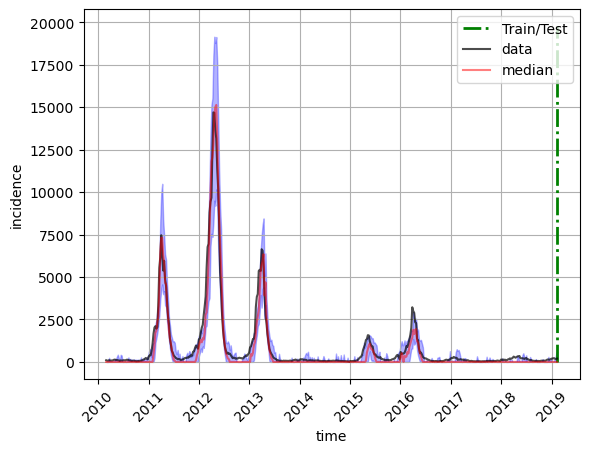

In [9]:
model = build_model(hidden = HIDDEN, features = FEAT, predict_n = PREDICT_N, look_back=LOOK_BACK, batch_size=1, loss = 'msle')

m_msle_all, h_msle_all, m_train_all, m_val_all = make_pred(model, CITY, doenca = 'dengue', epochs = EPOCHS, end_train_date = None, 
                    ratio= 1.0, end_date = END_DATE,
                     predict_n = PREDICT_N, look_back =  LOOK_BACK, label = 'msle_all',  filename = FILENAME_DATA)

PGBM model

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Estimator 0/100, Train metric: 2165.7489
Estimator 1/100, Train metric: 1977.5900
Estimator 2/100, Train metric: 1807.5493
Estimator 3/100, Train metric: 1653.7111
Estimator 4/100, Train metric: 1511.5036
Estimator 5/100, Train metric: 1382.4440
Estimator 6/100, Train metric: 1267.4331
Estimator 7/100, Train metric: 1161.3657
Estimator 8/100, Train metric: 1063.9419
Estimator 9/100, Train metric: 974.4626
Estimator 10/100, Train metric: 893.5378
Estimator 11/100, Train metric: 819.1724
Estimator 12/100, Train metric: 751.6486
Estimator 13/100, Train metric: 690.0189
Estimator 14/100, Train metric: 634.1629
Estimator 15/100, Train metric: 582.6877
Estimator 16/100, Train metric: 535.8486
Estimator 17/100, Train metric: 492.9106
Estimator 18/100, Train metric: 453.5810
Estimator 19/100, Train metric: 417.6845
Estimator 20/100, Train metric: 384.9216
Estimator 21/100, Train metric: 355.0023
Estimator 22/100, Train metric: 327.7379
Estimator 23/100, Train metric: 302.9023
Estimator 24/100,

Estimator 4/100, Train metric: 1529.7727
Estimator 5/100, Train metric: 1404.2322
Estimator 6/100, Train metric: 1290.0591
Estimator 7/100, Train metric: 1182.2293
Estimator 8/100, Train metric: 1087.4903
Estimator 9/100, Train metric: 996.1800
Estimator 10/100, Train metric: 913.9624
Estimator 11/100, Train metric: 837.7386
Estimator 12/100, Train metric: 771.8019
Estimator 13/100, Train metric: 708.2506
Estimator 14/100, Train metric: 650.2658
Estimator 15/100, Train metric: 599.8266
Estimator 16/100, Train metric: 551.3720
Estimator 17/100, Train metric: 509.1885
Estimator 18/100, Train metric: 468.8928
Estimator 19/100, Train metric: 432.1491
Estimator 20/100, Train metric: 399.6462
Estimator 21/100, Train metric: 368.9980
Estimator 22/100, Train metric: 342.3255
Estimator 23/100, Train metric: 317.3657
Estimator 24/100, Train metric: 294.8363
Estimator 25/100, Train metric: 274.2807
Estimator 26/100, Train metric: 254.4391
Estimator 27/100, Train metric: 234.7294
Estimator 28/100,

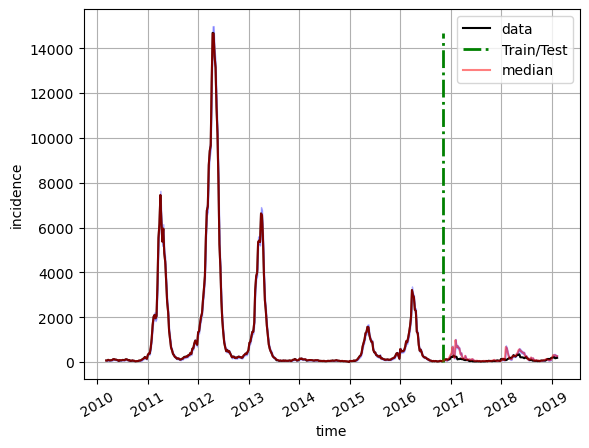

In [10]:

preds, preds25, preds975, X_train, targets = pgbm_pred(CITY, STATE, predict_n = PREDICT_N, look_back = LOOK_BACK,
                                                           doenca = 'dengue', ratio = 0.75, ini_date = None,
                                                           end_date = END_DATE, label = 'train_test',  filename = FILENAME_DATA)

Estimator 0/100, Train metric: 1919.2563
Estimator 1/100, Train metric: 1752.4034
Estimator 2/100, Train metric: 1601.5805
Estimator 3/100, Train metric: 1465.3009
Estimator 4/100, Train metric: 1339.4747
Estimator 5/100, Train metric: 1225.1244
Estimator 6/100, Train metric: 1121.7011
Estimator 7/100, Train metric: 1027.0450
Estimator 8/100, Train metric: 940.4472
Estimator 9/100, Train metric: 861.8921
Estimator 10/100, Train metric: 790.3969
Estimator 11/100, Train metric: 725.1074
Estimator 12/100, Train metric: 665.3021
Estimator 13/100, Train metric: 610.8301
Estimator 14/100, Train metric: 560.9252
Estimator 15/100, Train metric: 515.4926
Estimator 16/100, Train metric: 474.3596
Estimator 17/100, Train metric: 436.5888
Estimator 18/100, Train metric: 402.4211
Estimator 19/100, Train metric: 370.6306
Estimator 20/100, Train metric: 341.6690
Estimator 21/100, Train metric: 315.2225
Estimator 22/100, Train metric: 290.5914
Estimator 23/100, Train metric: 268.2081
Estimator 24/100, 

Estimator 4/100, Train metric: 1358.3908
Estimator 5/100, Train metric: 1245.3946
Estimator 6/100, Train metric: 1143.1332
Estimator 7/100, Train metric: 1049.8641
Estimator 8/100, Train metric: 962.7965
Estimator 9/100, Train metric: 885.0885
Estimator 10/100, Train metric: 811.5339
Estimator 11/100, Train metric: 746.8958
Estimator 12/100, Train metric: 688.1350
Estimator 13/100, Train metric: 631.2835
Estimator 14/100, Train metric: 582.0796
Estimator 15/100, Train metric: 535.5711
Estimator 16/100, Train metric: 492.0829
Estimator 17/100, Train metric: 454.5351
Estimator 18/100, Train metric: 418.6352
Estimator 19/100, Train metric: 385.2058
Estimator 20/100, Train metric: 355.1745
Estimator 21/100, Train metric: 327.6178
Estimator 22/100, Train metric: 301.9414
Estimator 23/100, Train metric: 278.9535
Estimator 24/100, Train metric: 258.1061
Estimator 25/100, Train metric: 238.8773
Estimator 26/100, Train metric: 221.3323
Estimator 27/100, Train metric: 205.5269
Estimator 28/100, 

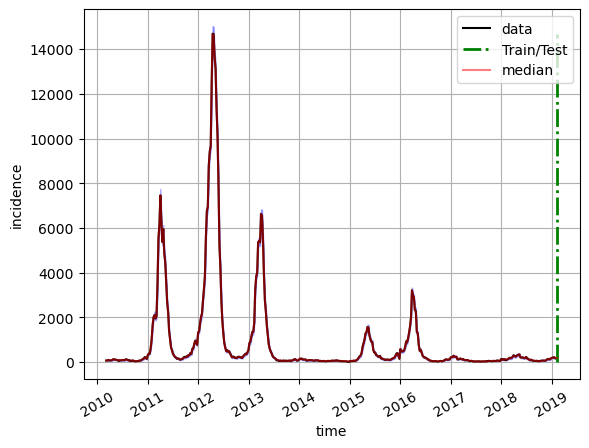

In [11]:
preds, preds25, preds975, X_train, targets = pgbm_pred(CITY, STATE, PREDICT_N, LOOK_BACK, doenca = 'dengue', ini_date = None, end_train_date = END_DATE, end_date = END_DATE,  filename = FILENAME_DATA)
   